In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [103]:
h_data=pd.read_csv("hospital_hub - Sheet3.csv")

In [104]:
h_data.head(10)

,Sr.No.,Hospital_Name,Department,No _of_doctors,Rating,Address,Contact_info,Facility,Mediclaim,Ayushman_Card,Emergency_Service,Availability_of_Ambulance,Total_Beds,Booked_Beds,Staff_Members,Availability_Time
0,1,Shraddha Arogya Mandir Hospital,Orthopedics,4,4.5,"St Bus Stand Rd, behind hotel kaveri, Rayon Ho...",1063236747,ICU,True,True,False,False,18.0,6,9,8:00 AM to 5:00 PM
1,2,Dolakia Hospital,General Surgery,5,5.0,"2nd Floor, J B Complex, Junagadh",1379276232,ICU,True,True,True,True,14.0,1,7,9:00 AM to 6:00 PM
2,3,Kazi Hospital,Opthamalogy,2,4.0,"Dhasa, Gujarat 364740",3058484338,ICU,True,False,False,False,11.0,4,6,8:30 AM to 5:30 PM
3,4,N.M. Lakhani Hospital,Cardiology,3,4.1,"Rajyash Rise, Ahmedabad",3844156915,Non-ICU,True,True,True,False,10.0,6,5,10:00 AM to 7:00 PM
4,5,Life Care Hospital,Orthopedics,4,3.5,35237 Talmadge Center,9771081686,Non-ICU,False,False,True,NaN,24.0,6,12,8:00 AM to 5:00 PM
5,6,Shreeji Orthopaedic Hospital,Orthopedics,5,4.5,20917 Claremont Crossing,6101516561,ICU,True,False,False,False,24.0,7,12,9:00 AM to 6:00 PM
6,7,Aditya Children’s Hospital,Pediatrics,3,3.5,14 Sycamore Alley,6902352207,ICU,False,True,True,True,13.0,1,7,8:30 AM to 5:30 PM
7,8,Shreenathji Hospital,General Surgery,3,3.5,8 Springs Plaza,1257263071,ICU,False,True,NaN,False,NaN,9,13,9:00 AM to 6:00 PM
8,9,K J MULTISPECIALITY HOSPITAL,General Surgery,4,4.5,8 Memorial Point,6946724859,ICU,True,False,True,False,9.0,4,5,8:00 AM to 5:00 PM
9,10,Government Civil Hospital,Dermatology,2,3.5,21052 Walton Avenue,1243115123,Non-ICU,True,False,True,True,11.0,10,6,8:30 AM to 5:30 PM


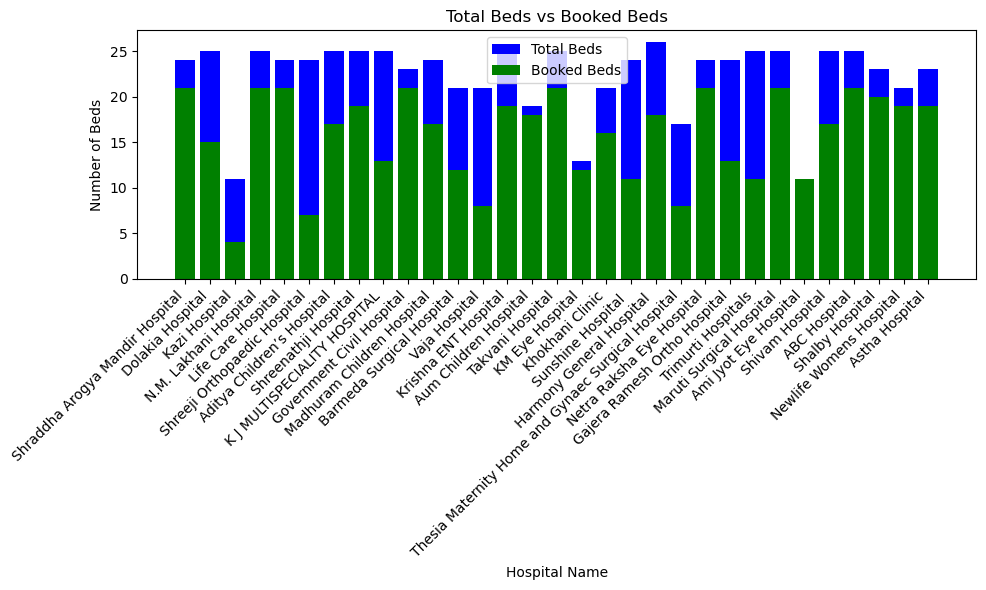

In [68]:
import matplotlib.pyplot as plt

Total_Beds_data = h_data['Total_Beds']
Booked_Beds_data = h_data['Booked_Beds']
hospital_names = h_data['Hospital_Name']

# Plotting the data in bar format
plt.figure(figsize=(10, 6))
plt.bar(hospital_names, Total_Beds_data, label='Total Beds', color='blue')
plt.bar(hospital_names, Booked_Beds_data, label='Booked Beds', color='green')
plt.title('Total Beds vs Booked Beds')
plt.xlabel('Hospital Name')
plt.ylabel('Number of Beds')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [105]:
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Sr.No.                     151 non-null    int64  
 1   Hospital_Name              151 non-null    object 
 2   Department                 151 non-null    object 
 3   No _of_doctors             151 non-null    int64  
 4   Rating                     139 non-null    float64
 5   Address                    151 non-null    object 
 6   Contact_info               151 non-null    int64  
 7   Facility                   151 non-null    object 
 8   Mediclaim                  140 non-null    object 
 9   Ayushman_Card              139 non-null    object 
 10  Emergency_Service          142 non-null    object 
 11  Availability_of_Ambulance  144 non-null    object 
 12  Total_Beds                 150 non-null    float64
 13  Booked_Beds                151 non-null    int64  

In [106]:
h_data.isnull().sum()

Sr.No.                        0
Hospital_Name                 0
Department                    0
No _of_doctors                0
Rating                       12
Address                       0
Contact_info                  0
Facility                      0
Mediclaim                    11
Ayushman_Card                12
Emergency_Service             9
Availability_of_Ambulance     7
Total_Beds                    1
Booked_Beds                   0
Staff_Members                 0
Availability_Time             0
dtype: int64

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


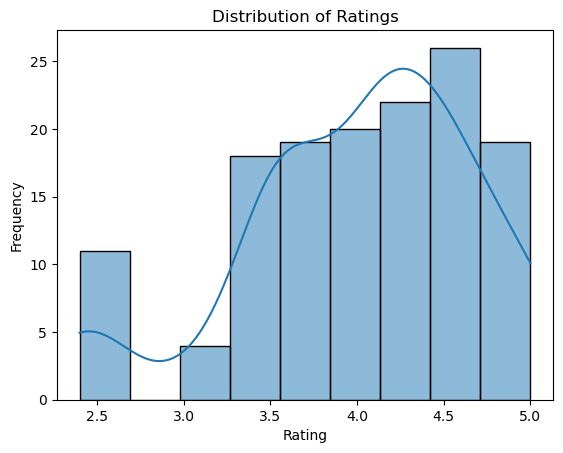

In [71]:
sns.histplot(h_data['Rating'], kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


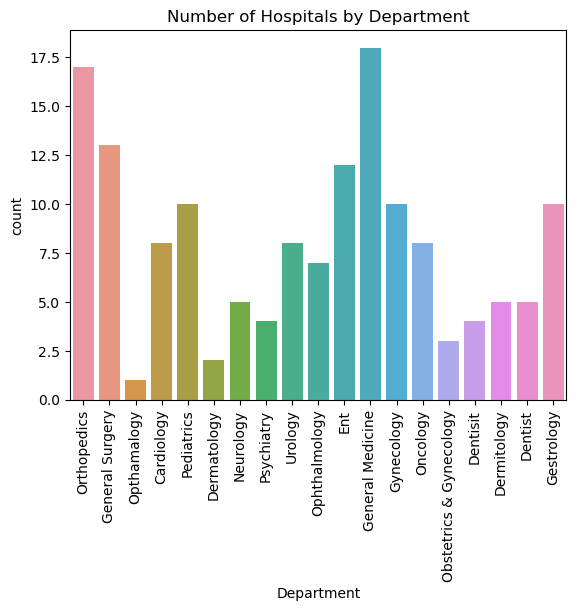

In [95]:
sns.countplot(x='Department', data=h_data)
plt.title('Number of Hospitals by Department')
plt.xticks(rotation=90)
plt.show()


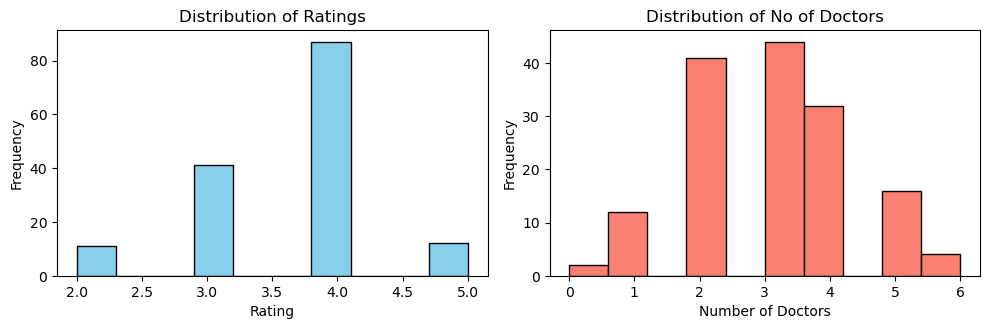

In [107]:
# Convert 'Rating', 'No _of_doctors' columns to numeric
h_data['Rating'] = pd.to_numeric(h_data['Rating'], errors='coerce')
h_data['No _of_doctors'] = pd.to_numeric(h_data['No _of_doctors'], errors='coerce')

# Calculate mean values
rating_mean = h_data['Rating'].mean()
doctors_mean = h_data['No _of_doctors'].mean()

# Fill null values with mean values
h_data['Rating'].fillna(rating_mean, inplace=True)
h_data['No _of_doctors'].fillna(doctors_mean, inplace=True)

# Convert 'Rating' and 'No _of_doctors' to integers
h_data['Rating'] = h_data['Rating'].astype(int)
h_data['No _of_doctors'] = h_data['No _of_doctors'].astype(int)

# Visualization
plt.figure(figsize=(10, 6))

# Histogram for 'Rating'
plt.subplot(2, 2, 1)
plt.hist(h_data['Rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Histogram for 'No _of_doctors'
plt.subplot(2, 2, 2)
plt.hist(h_data['No _of_doctors'], bins=10, color='salmon', edgecolor='black')
plt.title('Distribution of No of Doctors')
plt.xlabel('Number of Doctors')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [108]:
# Preprocessing Hospital Name
h_data['Hospital_Name'] = h_data['Hospital_Name'].str.strip()  
h_data['Hospital_Name'] = h_data['Hospital_Name'].str.upper()  


In [109]:
# Preprocessing Department or Specialty
h_data['Department'] = h_data['Department'].str.title()


In [110]:
import pandas as pd

# Assuming hospital_data is your DataFrame containing the columns 'Total Beds' and 'Booked Beds'
h_data['Available_Beds'] = h_data['Total_Beds'] - h_data['Booked_Beds']

print(h_data.head())


   Sr.No.                    Hospital_Name       Department  No _of_doctors  \
0       1  SHRADDHA AROGYA MANDIR HOSPITAL      Orthopedics               4   
1       2                 DOLAKIA HOSPITAL  General Surgery               5   
2       3                    KAZI HOSPITAL      Opthamalogy               2   
3       4            N.M. LAKHANI HOSPITAL       Cardiology               3   
4       5               LIFE CARE HOSPITAL      Orthopedics               4   

   Rating                                            Address  Contact_info  \
0       4  St Bus Stand Rd, behind hotel kaveri, Rayon Ho...    1063236747   
1       5                   2nd Floor, J B Complex, Junagadh    1379276232   
2       4                              Dhasa, Gujarat 364740    3058484338   
3       4                            Rajyash Rise, Ahmedabad    3844156915   
4       3                              35237 Talmadge Center    9771081686   

  Facility Mediclaim Ayushman_Card Emergency_Service  \


In [111]:
h_data['Available_Beds'] = pd.to_numeric(h_data['Available_Beds'], errors='coerce')  # Convert to numeric
h_data = h_data.dropna(subset=['Available_Beds'])  # Remove rows with missing available bed data


In [112]:
h_data.head()

,Sr.No.,Hospital_Name,Department,No _of_doctors,Rating,Address,Contact_info,Facility,Mediclaim,Ayushman_Card,Emergency_Service,Availability_of_Ambulance,Total_Beds,Booked_Beds,Staff_Members,Availability_Time,Available_Beds
0,1,SHRADDHA AROGYA MANDIR HOSPITAL,Orthopedics,4,4,"St Bus Stand Rd, behind hotel kaveri, Rayon Ho...",1063236747,ICU,True,True,False,False,18.0,6,9,8:00 AM to 5:00 PM,12.0
1,2,DOLAKIA HOSPITAL,General Surgery,5,5,"2nd Floor, J B Complex, Junagadh",1379276232,ICU,True,True,True,True,14.0,1,7,9:00 AM to 6:00 PM,13.0
2,3,KAZI HOSPITAL,Opthamalogy,2,4,"Dhasa, Gujarat 364740",3058484338,ICU,True,False,False,False,11.0,4,6,8:30 AM to 5:30 PM,7.0
3,4,N.M. LAKHANI HOSPITAL,Cardiology,3,4,"Rajyash Rise, Ahmedabad",3844156915,Non-ICU,True,True,True,False,10.0,6,5,10:00 AM to 7:00 PM,4.0
4,5,LIFE CARE HOSPITAL,Orthopedics,4,3,35237 Talmadge Center,9771081686,Non-ICU,False,False,True,NaN,24.0,6,12,8:00 AM to 5:00 PM,18.0


In [113]:
def find_hospitals_by_department(department):
    relevant_hospitals = h_data[h_data['Department'] == department]
    # relevant_hospitals_sorted = relevant_hospitals.sort_values(by='Rating', ascending=True)
    return relevant_hospitals_sorted


In [114]:
def find_hospitals_by_department(department):
    relevant_hospitals = h_data[h_data['Department'] == department]
    return relevant_hospitals


In [115]:
def display_results(hospitals):
    hospitals_sorted = hospitals.sort_values(by='Rating', ascending=False)
    for index, hospital in hospitals_sorted.iterrows():
        print(f"Hospital Name: {hospital['Hospital_Name']}")
        print(f"Number of Available Doctors: {hospital['No _of_doctors']}")
        print(f"Hospital Rating: {hospital['Rating']}")
        print("")


In [138]:
department = input("Enter the department or specialty: ")
relevant_hospitals = find_hospitals_by_department(department)
display_results(relevant_hospitals)


Enter the department or specialty:  Orthopedics


Hospital Name: SHRADDHA AROGYA MANDIR HOSPITAL
Number of Available Doctors: 4
Hospital Rating: 4

Hospital Name: MADHURAM CHILDREN HOSPITAL
Number of Available Doctors: 3
Hospital Rating: 4

Hospital Name: ABC HOSPITAL
Number of Available Doctors: 2
Hospital Rating: 4

Hospital Name: ADITYA CHILDREN’S HOSPITAL
Number of Available Doctors: 1
Hospital Rating: 4

Hospital Name: SHREENATHJI HOSPITAL
Number of Available Doctors: 2
Hospital Rating: 4

Hospital Name: GOVERNMENT CIVIL HOSPITAL
Number of Available Doctors: 2
Hospital Rating: 4

Hospital Name: SHIVAM HOSPITAL
Number of Available Doctors: 6
Hospital Rating: 4

Hospital Name: GAJERA RAMESH ORTHO HOSPITAL
Number of Available Doctors: 1
Hospital Rating: 4

Hospital Name: BARMEDA SURGICAL HOSPITAL
Number of Available Doctors: 2
Hospital Rating: 4

Hospital Name: SHREEJI ORTHOPAEDIC HOSPITAL
Number of Available Doctors: 5
Hospital Rating: 4

Hospital Name: LIFE CARE HOSPITAL
Number of Available Doctors: 4
Hospital Rating: 3

Hospital 

In [47]:
'''import tkinter as tk
from tkinter import ttk

# Define relevant_hospitals_sorted globally
relevant_hospitals_sorted = None

def book_appointment():
    global relevant_hospitals_sorted
    selected_hospital_index = var.get()
    if selected_hospital_index == -1:
        print("Please select a hospital.")
        return
    selected_hospital = relevant_hospitals_sorted.iloc[selected_hospital_index]
    contact_number = selected_hospital['Contact info']
    print(f"Contact Number for {selected_hospital['Hospital Name']}: {contact_number}")

def update_hospitals():
    global relevant_hospitals_sorted
    department = department_var.get()
    relevant_hospitals = find_hospitals_by_department(department)
    relevant_hospitals_sorted = relevant_hospitals.sort_values(by='Rating', ascending=False)
    hospital_names = relevant_hospitals_sorted['Hospital Name'].tolist()
    hospital_menu['menu'].delete(0, 'end')
    for i, name in enumerate(hospital_names):
        hospital_menu['menu'].add_command(label=name, command=tk._setit(var, i))
    var.set(-1)

# Create Tkinter window
root = tk.Tk()
root.title("Book Appointment")

# Create a label for department selection
department_label = tk.Label(root, text="Select Department:")
department_label.pack()

# Create a dropdown menu for department selection
departments = ["Pediatrics", "Orthopedics", "Cardiology", "General Medicine", "General Surgery", "ENT", "Dermatology", "Neurology", "Psychiatry", "Urology", "Ophthalmology", "Obstetrics & Gynecology", "Gynecology"]  # Add more departments as needed
department_var = tk.StringVar(root)
department_var.set(departments[0])
department_menu = ttk.OptionMenu(root, department_var, *departments, command=lambda _: update_hospitals())
department_menu.pack()

# Create a label for hospital selection
hospital_label = tk.Label(root, text="Select Hospital:")
hospital_label.pack()

# Create a dropdown menu for hospital selection
var = tk.IntVar(root)
hospital_menu = ttk.OptionMenu(root, var, -1, "No hospitals available", command=lambda _: None)
hospital_menu.pack()

# Create a button to book appointment
book_button = tk.Button(root, text="Book Appointment", command=book_appointment)
book_button.pack()

root.mainloop()
'''

Contact Number for TRIMURTI HOSPITALS: 4770526466


In [117]:
import tkinter as tk
from tkinter import ttk

# Define relevant_hospitals_sorted globally
relevant_hospitals_sorted = None

def book_appointment():
    global relevant_hospitals_sorted
    selected_hospital_index = var.get()
    if selected_hospital_index == -1:
        print("Please select a hospital.")
        return
    selected_hospital = relevant_hospitals_sorted.iloc[selected_hospital_index]
    contact_number = selected_hospital['Contact_info']
    print(f"Hospital Name: {selected_hospital['Hospital_Name']}")
    print(f"Contact Number: {contact_number}")
    print(f"Number of Doctors: {selected_hospital['No _of_doctors']}")
    print(f"Availability Time of Doctors: {selected_hospital['Availability_Time']}")
    print(f"Number of Available Beds: {selected_hospital['Available_Beds']}")
    print(f"Address: {selected_hospital['Address']}")
    print("")

def update_hospitals():
    global relevant_hospitals_sorted
    department = department_var.get()
    relevant_hospitals = find_hospitals_by_department(department)
    relevant_hospitals_sorted = relevant_hospitals.sort_values(by='Rating', ascending=False)
    hospital_names = relevant_hospitals_sorted['Hospital_Name'].tolist()
    hospital_menu['menu'].delete(0, 'end')
    for i, name in enumerate(hospital_names):
        hospital_menu['menu'].add_command(label=name, command=tk._setit(var, i))
    var.set(-1)

# Create Tkinter window
root = tk.Tk()
root.title("Hospital Details")

# Create a label for department selection
department_label = tk.Label(root, text="Select Department:")
department_label.pack()

# Create a dropdown menu for department selection
departments = ["select","Gestrology","Oncology","Dentist","Pediatrics", "Orthopedics", "Cardiology", "General Medicine", "General Surgery", "ENT", "Dermatology", "Neurology", "Psychiatry", "Urology", "Ophthalmology", "Obstetrics & Gynecology", "Gynecology"]  # Add more departments as needed
department_var = tk.StringVar(root)
department_var.set(departments[0])
department_menu = ttk.OptionMenu(root, department_var, *departments, command=lambda _: update_hospitals())
department_menu.pack()

# Create a label for hospital selection
hospital_label = tk.Label(root, text="Select Hospital:")
hospital_label.pack()

# Create a dropdown menu for hospital selection
var = tk.IntVar(root)
hospital_menu = ttk.OptionMenu(root, var, 1, "No hospitals available", command=lambda _: None)
hospital_menu.pack()

# Create a button to book appointment
book_button = tk.Button(root, text="Hospital Details", command=book_appointment)
book_button.pack()

root.mainloop()


Hospital Name: K J MULTISPECIALITY HOSPITAL
Contact Number: 7360313944
Number of Doctors: 3
Availability Time of Doctors: 8:30 AM to 5:30 PM
Number of Available Beds: 6.0
Address: Railway station road



In [143]:
import tkinter as tk
from tkinter import ttk

# Define relevant_hospitals_sorted globally
relevant_hospitals_sorted = None

def sort_hospitals_by_criteria(criteria):
    global relevant_hospitals_sorted
    if criteria == "available beds":
        relevant_hospitals_sorted = relevant_hospitals_sorted.sort_values(by='Available_Beds', ascending=False)
    elif criteria == "Emergency service":
        relevant_hospitals_sorted = relevant_hospitals_sorted.sort_values(by='Emergency_Service', ascending=False)
    elif criteria == "No of doctors":
        relevant_hospitals_sorted = relevant_hospitals_sorted.sort_values(by='No _of_doctors', ascending=False)
    elif criteria == "Mediclaim":
        relevant_hospitals_sorted = relevant_hospitals_sorted.sort_values(by='Mediclaim', ascending=False)
    elif criteria == "Ayushman card":
        relevant_hospitals_sorted = relevant_hospitals_sorted.sort_values(by='Ayushman_Card', ascending=False)
    elif criteria == "Rating":
        relevant_hospitals_sorted = relevant_hospitals_sorted.sort_values(by='Rating', ascending=False)

def book_appointment():
    global relevant_hospitals_sorted
    selected_hospital_index = var.get()
    if selected_hospital_index == -1:
        result_text.insert(tk.END, "Please select a hospital.\n")
        return
    
    selected_hospital = relevant_hospitals_sorted.iloc[selected_hospital_index]
    contact_number = selected_hospital['Contact_info']
    result_text.insert(tk.END, "\n")
    result_text.insert(tk.END, f"Hospital Name: {selected_hospital['Hospital_Name']}\n")
    result_text.insert(tk.END, f"Contact Number: {contact_number}\n")
    result_text.insert(tk.END, f"Number of Doctors: {selected_hospital['No _of_doctors']}\n")
    result_text.insert(tk.END, f"Availability Time of Doctors: {selected_hospital['Availability_Time']}\n")
    result_text.insert(tk.END, f"Number of Available Beds: {selected_hospital['Available_Beds']}\n")
    result_text.insert(tk.END, f"Address: {selected_hospital['Address']}\n")
    result_text.insert(tk.END, "\n")

def update_hospitals():
    global relevant_hospitals_sorted
    department = department_var.get()
    relevant_hospitals = find_hospitals_by_department(department)
    relevant_hospitals_sorted = relevant_hospitals.sort_values(by='Rating', ascending=False)
    sort_hospitals_by_criteria(filter_criteria_var.get())  # Sort hospitals based on filter criteria
    hospital_names = relevant_hospitals_sorted['Hospital_Name'].tolist()
    hospital_menu['menu'].delete(0, 'end')
    for i, name in enumerate(hospital_names):
        hospital_menu['menu'].add_command(label=name, command=tk._setit(var, i))
    var.set(-1)

# Create Tkinter window
root = tk.Tk()
root.title("Hospital Hub")

# Styling
root.configure(background='lightblue')  # Set background color of the window

# Create a label for Hospital Hub
'''hospital_hub_label = tk.Label(root, text="Hospital Hub", font=("Arial", 24, "bold"), fg="green", background='lightblue')
# hospital_hub_label = tk.Label(root, text="Explore and choose the perfect hospital for you!!", font=("Pacifico", 16), fg="green", background='lightblue')

hospital_hub_label.grid(row=0, column=0, columnspan=2, sticky='nw', padx=10, pady=10)  # Position the label in upper left corner'''

# Create a label for Hospital Hub
hospital_hub_label = tk.Label(root, text="Hospital Hub", font=("Arial", 24, "bold"), fg="green", background='lightblue')
hospital_hub_label.grid(row=0, column=0, sticky='nw', padx=10, pady=10)  # Position the label in upper left corner

# Create a label for the sentence
sentence_label = tk.Label(root, text="Explore and choose the perfect hospital for you!!", font=("Pacifico", 16), fg="green", background='lightblue')
sentence_label.grid(row=0, column=1, sticky='nw', padx=2, pady=2)  # Position the label beside the Hospital Hub title


# Create a frame for the dropdowns
dropdown_frame = tk.Frame(root, background='lightblue')
dropdown_frame.grid(row=1, column=0, columnspan=2, sticky='nsew', padx=10, pady=10)

# Create a label for department selection
department_label = tk.Label(dropdown_frame, text="Select Department that you are searching for:", background='lightblue')
department_label.grid(row=0, column=0, padx=5, pady=5)

# Create a dropdown menu for department selection
departments = ["select","Gestrology","Oncology","Dentist","Pediatrics", "Orthopedics", "Cardiology", "General Medicine", "General Surgery", "ENT", "Dermatology", "Neurology", "Psychiatry", "Urology", "Ophthalmology", "Obstetrics & Gynecology", "Gynecology"]  # Add more departments as needed
department_var = tk.StringVar(root)
department_var.set(departments[0])
department_menu = ttk.OptionMenu(dropdown_frame, department_var, *departments, command=lambda _: update_hospitals())
department_menu.grid(row=0, column=1, padx=5, pady=5)

# Create a label for filter criteria
filter_criteria_label = tk.Label(dropdown_frame, text="Select Filter :", background='lightblue')
filter_criteria_label.grid(row=1, column=0, padx=5, pady=5)

# Create a dropdown menu for filter criteria
filter_criteria_options = ["select","available beds", "Emergency service", "No of doctors", "Mediclaim", "Ayushman card", "Rating"]
filter_criteria_var = tk.StringVar(root)
filter_criteria_var.set(filter_criteria_options[0])
filter_criteria_menu = ttk.OptionMenu(dropdown_frame, filter_criteria_var, *filter_criteria_options, command=lambda _: update_hospitals())
filter_criteria_menu.grid(row=1, column=1, padx=5, pady=5)

# Create a label for hospital selection
hospital_label = tk.Label(dropdown_frame, text="Select Hospital:", background='lightblue')
hospital_label.grid(row=2, column=0, padx=5, pady=5)

# Create a dropdown menu for hospital selection
var = tk.IntVar(root)
hospital_menu = ttk.OptionMenu(dropdown_frame, var, -1, "No hospitals available")
hospital_menu.grid(row=2, column=1, padx=5, pady=5)

# Create a button to book appointment
book_button = tk.Button(root, text="Hospital Details", command=book_appointment)
book_button.grid(row=3, column=0, columnspan=2, sticky='nsew', padx=10, pady=10)

# Create a text widget to display the output
result_text = tk.Text(root, height=20, width=80)
result_text.grid(row=4, column=0, columnspan=2, sticky='nsew', padx=10, pady=10)

# Configure row and column weights
root.grid_rowconfigure(4, weight=1)
root.grid_columnconfigure(0, weight=1)
root.grid_columnconfigure(1, weight=1)

root.mainloop()
